# Accediendo a datos de modelos CMIP6
Este cuaderno de Jupyter muestra como acceder a datos de modelos CMIP6 utilizando la Coleccion Pangeo Cloud a traves de las bibliotecas `intake` y `cmip6_preprocessing`. Ademas se muestra como hacer una manipulacion de datos sencilla con `xarray` para crear mapas utilizando las bibliotecas `matplotlib` y `cartopy`.

In [2]:
import xarray as xr
import numpy as np
import intake
from cmip6_preprocessing.preprocessing import combined_preprocessing
import matplotlib.pyplot as plt
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import os

In [3]:
#Asegurandose de mostrar graficos dentro del cuaderno Jupyter
%matplotlib inline

# Cargando datos CMIP6 con las bibliotecas `intake` y `cmip6_preprocessing`
Si quisieras mas informacion sobre como funciona el paquete `intake`, puedes referirte a la documentacion, la cual esta solamente disponible en ingles [aqui](https://intake.readthedocs.io/en/latest/start.html). Tutoriales del uso de `cmip6_preprocessing` estan disponibles en ingles [aqui](https://cmip6-preprocessing.readthedocs.io/en/latest/tutorial.html).

In [4]:
#Abriremos una conexion con la coleccion de Pangeo Cloud
coleccion_pangeo = intake.open_esm_datastore("https://storage.googleapis.com/cmip6/pangeo-cmip6.json")

In [4]:
#Veamos los modelos CMIP6 disponibles en la coleccion
coleccion_pangeo.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,huss,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
517242,ScenarioMIP,MIROC,MIROC6,ssp245,r29i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp2...,NaN,20210917
517243,ScenarioMIP,MIROC,MIROC6,ssp245,r21i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp2...,NaN,20210917
517244,ScenarioMIP,MIROC,MIROC6,ssp245,r37i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MIROC/MIROC6/ssp2...,NaN,20210917
517245,CMIP,KIOST,KIOST-ESM,1pctCO2,r1i1p1f1,Amon,pr,gr1,gs://cmip6/CMIP6/CMIP/KIOST/KIOST-ESM/1pctCO2/...,NaN,20210928


Como pueden notar, existen una gran cantidad de modelos CMIP6 disponibles a traves de Pangeo. Para este ejercicio, nos vamos a enfocar en uno de estos modelos que fue escogido previamente. Pero si quisieras saber mas sobre los modelos CMIP6, puedes referirte al sitio web de [World Climate Research Programme (WCRP)](https://www.wcrp-climate.org/modelling-wgcm-mip-catalogue/modelling-wgcm-cmip6-endorsed-mips).

Vale la pena recalcar que las variables ambientales estan guardadas con codigos especificos que han sido estandarizados para todos los modelos CMIP6. Puedes encontrar la variable de tu interes utilizando esta [pagina web](https://clipc-services.ceda.ac.uk/dreq/mipVars.html). Para este ejercicio una variable fue previamente seleccionada.

In [5]:
#Crearemos un diccionario busqueda para datos historicos de la temperatura del oceano del modelo ACCESS-ESM1.5
busq = coleccion_pangeo.search(variable_id = 'tos', #el codigo que se refiere a la temperatura del oceano
                                 experiment_id = 'historical', #datos historicos, cubre el periodo de 1850 a 2014.
                                 source_id = 'ACCESS-ESM1-5', #modelo de nuestro interes, ACCESS-ESM1.5
                                 table_id = 'Omon', #codigo que se refiere a datos oceanicos almacenados por mes
                                 member_id = 'r3i1p1f1') #codigo de experimento

In [6]:
#Veamos los resultados de esta busqueda
busq.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CSIRO,ACCESS-ESM1-5,historical,r3i1p1f1,Omon,tos,gn,gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/hist...,NaN,20191203


Ahora que identificamos a los datos que nos interesan, entonces vamos a guardar esta informacion en un diccionario.

In [6]:
datos_dict = busq.to_dataset_dict(zarr_kwargs={'consolidated': True, #Consolidar todos los datos
                                                 'use_cftime': True}, #Guardar fecha/hora con formato cftime
                                    storage_options = {'token': 'anon'}, #Nos permite acceder a los datos en Pangeo Cloud
                                    aggregate = False,
                                    preprocess = combined_preprocessing)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.zstore.dcpp_init_year.version'


In [8]:
#Veamos nuestros resultados
datos_dict

{'CMIP.CSIRO.ACCESS-ESM1-5.historical.r3i1p1f1.Omon.tos.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r3i1p1f1/Omon/tos/gn/v20191203/.nan.20191203': <xarray.Dataset>
 Dimensions:        (x: 360, y: 300, time: 1980, bnds: 2, vertex: 4)
 Coordinates:
   * x              (x) int32 0 1 2 3 4 5 6 7 ... 352 353 354 355 356 357 358 359
   * y              (y) int32 0 1 2 3 4 5 6 7 ... 292 293 294 295 296 297 298 299
     lat            (y, x) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
     lon            (y, x) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
   * time           (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
     time_bounds    (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
     lat_verticies  (y, x, vertex) float64 dask.array<chunksize=(300, 360, 4), meta=np.ndarray>
     lon_verticies  (y, x, vertex) float64 dask.array<chunksize=(300, 360, 4), meta=np.ndarray>
   * bnds           (bnds) int64 0 1
   * vertex

# Manipulando y visualizando datos

In [7]:
temperaturas = datos_dict['CMIP.CSIRO.ACCESS-ESM1-5.historical.r3i1p1f1.Omon.tos.gn.gs://cmip6/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r3i1p1f1/Omon/tos/gn/v20191203/.nan.20191203'].tos
temperaturas

<xarray.DataArray 'tos' (time: 1980, y: 300, x: 360)>
dask.array<open_dataset-698d28e2d23270e2f1283cc61b3fb9a7tos, shape=(1980, 300, 360), dtype=float32, chunksize=(201, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 ... 351 352 353 354 355 356 357 358 359
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 291 292 293 294 295 296 297 298 299
    lat      (y, x) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    lon      (y, x) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    history:        2019-12-03T10:07:53Z altered by CMOR: replaced missing va...
    long_name:      Sea Surface Temperature
    standard_name:  sea_surface_temperature
    units:          degC

Tenemos datos disponibles desde 1850, pero en realidad solo nos interesan cambios en temperaturas desde 1960. Asi que recortemos estos datos.

In [11]:
temp_actual = temperaturas.sel(time = slice('1960', '2014'))
temp_actual

<xarray.DataArray 'tos' (time: 660, y: 300, x: 360)>
dask.array<getitem, shape=(660, 300, 360), dtype=float32, chunksize=(201, 300, 360), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * y        (y) float64 -77.88 -77.63 -77.38 -77.13 ... 65.21 65.21 65.21 65.21
    lat      (y, x) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
    lon      (y, x) float64 dask.array<chunksize=(300, 360), meta=np.ndarray>
  * time     (time) object 1960-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    history:        2019-12-03T10:07:53Z altered by CMOR: replaced missing va...
    long_name:      Sea Surface Temperature
    standard_name:  sea_surface_temperature
    units:          degC

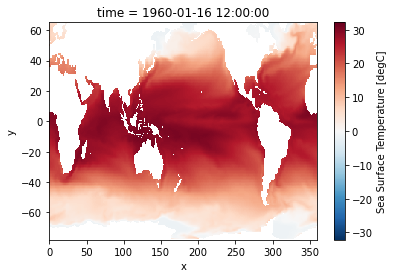

In [12]:
#Hagamos un grafico rapido de la primera fecha
temp_actual[0].plot()

Este mapa se ve un poco extrano. Esto se debe a que `matplotlib` esta usando indices para los ejes X y Y en vez de coordenadas, pero podemos corregir esto sin problema.

In [13]:
#Corregimos la longitud
temp_actual.coords['x'] = temp_actual['lon'][0].values
#y luego la latitud
temp_actual.coords['y'] = temp_actual['lat'][:,0].values

#Por ultimo es necesario que las coordenadas esten ordenadas, de otra manera no podremos crear graficos.
temp_actual = temp_actual.sortby(temp_actual.x)

Revisemos como se ve el mapa ahora. Solo utilizaremos la primera fecha.

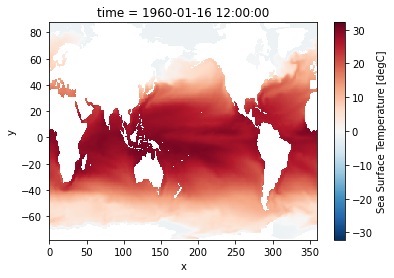

In [14]:
temp_actual[0].plot()

El mapa se ve mucho mejor, pero supongamos que solo quisieramos enfocarnos en un area especifica, como Ecuador. Veamos como seleccionamos estos datos.

In [28]:
temp_ecu = temp_actual.sel(y = slice(-6, 3), x = slice(250, 290))
temp_ecu

<xarray.DataArray 'tos' (time: 660, y: 27, x: 40)>
dask.array<getitem, shape=(660, 27, 40), dtype=float32, chunksize=(201, 27, 40), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 250.5 251.5 252.5 253.5 ... 286.5 287.5 288.5 289.5
  * y        (y) float64 -5.834 -5.5 -5.167 -4.833 ... 1.834 2.166 2.5 2.833
    lat      (y, x) float64 dask.array<chunksize=(27, 40), meta=np.ndarray>
    lon      (y, x) float64 dask.array<chunksize=(27, 40), meta=np.ndarray>
  * time     (time) object 1960-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Temperature of upper boundary of the liquid ocean, includ...
    history:        2019-12-03T10:07:53Z altered by CMOR: replaced missing va...
    long_name:      Sea Surface Temperature
    standard_name:  sea_surface_temperature
    units:          degC

Creemos un mapa con los datos de Ecuador.

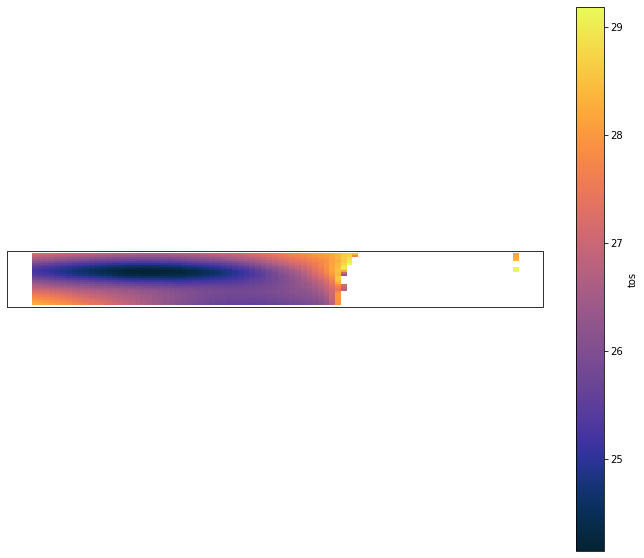

In [20]:
#Iniciamos una figura
fig = plt.figure(figsize = (12, 10))

#Vamos a aplicar una proyeccion
proj = ccrs.Mercator()

#Agregamos un eje donde ira el mapa
eje = fig.add_subplot(1, 1, 1, projection = proj)

#Ahora agregamos los datos de nuestro interes. Vamos a calcular la climatologia
temp_ecu.sel(time = slice('1984', '2014')).mean('time').plot.pcolormesh(ax = eje, 
#Utilizamos un mapa de color para mostrar temperaturas
transform = ccrs.PlateCarree(), cmap = cm.cm.thermal)

El mapa no se ve muy bien, pero podemos mejorarlo anadiendo continentes, por ejemplo, y mejorando la barra de color.

Text(0.5, 1.0, 'Climatologia de temperatura de superficide el oceano (1984-2014)')

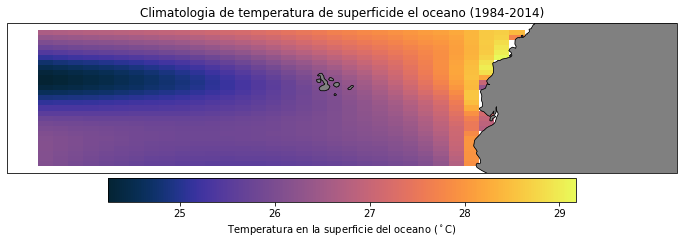

In [30]:
#Incluimos la misma base que utilizamos anteriormente
#Iniciamos una figura
fig = plt.figure(figsize = (12, 10))

#Vamos a aplicar una proyeccion
proj = ccrs.Mercator()

#Agregamos un eje donde ira el mapa
eje = fig.add_subplot(1, 1, 1, projection = proj)

#Llamamos a una capa que represente la tierra
tierra = cft.NaturalEarthFeature('physical', 'land', '50m',
#Cambiemos el borde y color de la tierra
edgecolor = 'black', linewidth = 0.5, facecolor = 'gray')

#Ahora agregamos los datos de nuestro interes. Vamos a calcular la climatologia
mapa = temp_ecu.sel(time = slice('1984', '2014')).mean('time').plot.pcolormesh(ax = eje, 
#Removemos la barra de colores
transform = ccrs.PlateCarree(), cmap = cm.cm.thermal, add_colorbar = False)

#Personalizamos la barra de color - la ubicaremos de manera horizontal
barra = fig.colorbar(mapa, ax = eje, orientation = 'horizontal',
#Reduciremos su tamanio y cambiaremos el espacio entre la barra y el mapa
shrink = 0.7, pad = 0.01)

#Le pondremos una leyenda a la barra
barra.ax.set_xlabel('Temperatura en la superficie del oceano ($^\circ$C)')

#Agregamos la capa de tierra
eje.coastlines(resolution = '50m')
eje.add_feature(tierra)

#Agregamos un titulo
eje.set_title('Climatologia de temperatura de superficide el oceano (1984-2014)')


Pero tambien podemos hacer otro tipo de graficos, como el de lineas. Podemos calcular las anomalias anuales y graficarlas.

In [31]:
#Guardamos la climatologia
ecu_clim = temp_ecu.sel(time = slice('1984', '2014')).mean('time')

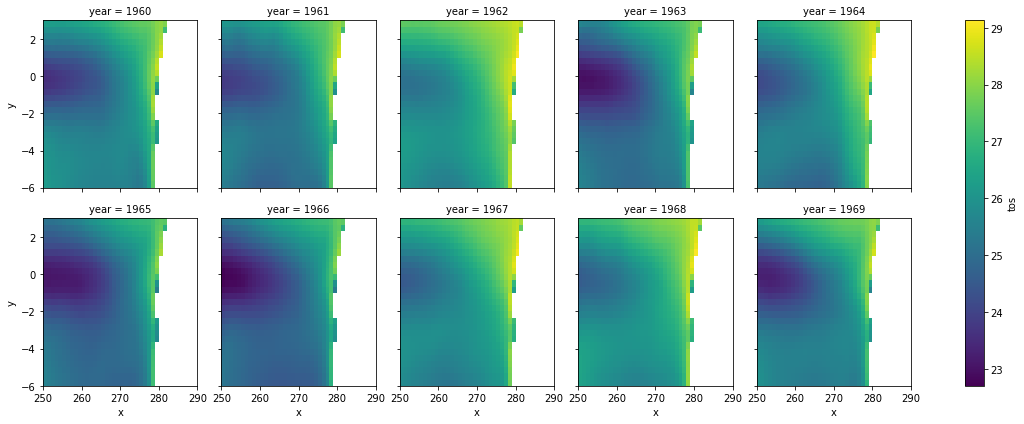

In [38]:
#Calculamos los promedios anuales
prom_anuales = temp_ecu.groupby('time.year').mean('time')

#Podemos visualizar estos resultados rapidamente
prom_anuales[0:10].plot(col = 'year', col_wrap = 5)

In [39]:
#Calculamos anomalias
anom_anuales = prom_anuales-ecu_clim
anom_anuales

<xarray.DataArray 'tos' (year: 55, y: 27, x: 40)>
dask.array<sub, shape=(55, 27, 40), dtype=float32, chunksize=(1, 27, 40), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 250.5 251.5 252.5 253.5 ... 286.5 287.5 288.5 289.5
  * y        (y) float64 -5.834 -5.5 -5.167 -4.833 ... 1.834 2.166 2.5 2.833
    lat      (y, x) float64 dask.array<chunksize=(27, 40), meta=np.ndarray>
    lon      (y, x) float64 dask.array<chunksize=(27, 40), meta=np.ndarray>
  * year     (year) int64 1960 1961 1962 1963 1964 ... 2010 2011 2012 2013 2014

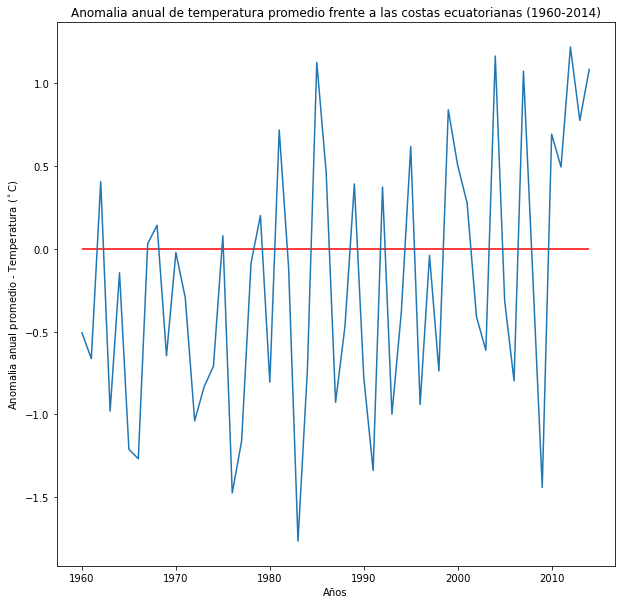

In [48]:
#Finalmente calculamos el promedio por anio en toda el area
fig = plt.figure(figsize = (10, 10))
eje = fig.add_subplot(111)

#Agregamos datos
anom_anuales.mean(('x', 'y')).plot()
#Incluimos linea horizontal con intercepto en cero, representando el promedio
plt.hlines(0, colors = 'red', xmin = anom_anuales.year.values.min(), 
xmax =  anom_anuales.year.values.max())

eje.set_xlabel('Años')
eje.set_ylabel('Anomalia anual promedio - Temperatura ($^\circ$C)')

eje.set_title('Anomalia anual de temperatura promedio frente a las costas ecuatorianas (1960-2014)')

#Si el resultado es de nuestro agrado, podemos guardar el grafico
carpeta = 'Datos'
#Revisar que la carpeta existe
os.makedirs(carpeta, exist_ok = True)

fig.savefig(os.path.join(carpeta, 'AnomaliaTemperaturas_1960-2014.png'), dpi = 300)